In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("heart_v2.csv")

In [3]:
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [4]:
y=df.pop("heart disease")
y.head()

0    1
1    0
2    1
3    0
4    0
Name: heart disease, dtype: int64

In [5]:
X=df
X.head()

,age,sex,BP,cholestrol
0,70,1,130,322
1,67,0,115,564
2,57,1,124,261
3,64,1,128,263
4,74,0,120,269


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=42)

In [8]:
X_train.shape,y_train.shape

((189, 4), (189,))

In [9]:
from sklearn import tree

In [10]:
model=tree.DecisionTreeClassifier(random_state=0)

In [11]:
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [12]:
model.score(X_train,y_train)

1.0

In [13]:
model.score(X_test,y_test)

0.6790123456790124

In [14]:
train_pred=model.predict(X_train)
train_pred

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0], dtype=int64)

In [15]:
test_pred=model.predict(X_test)
test_pred

array([1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
confusion_matrix(y_train,train_pred)

array([[101,   0],
       [  0,  88]], dtype=int64)

In [18]:
confusion_matrix(y_test,test_pred)

array([[33, 16],
       [10, 22]], dtype=int64)

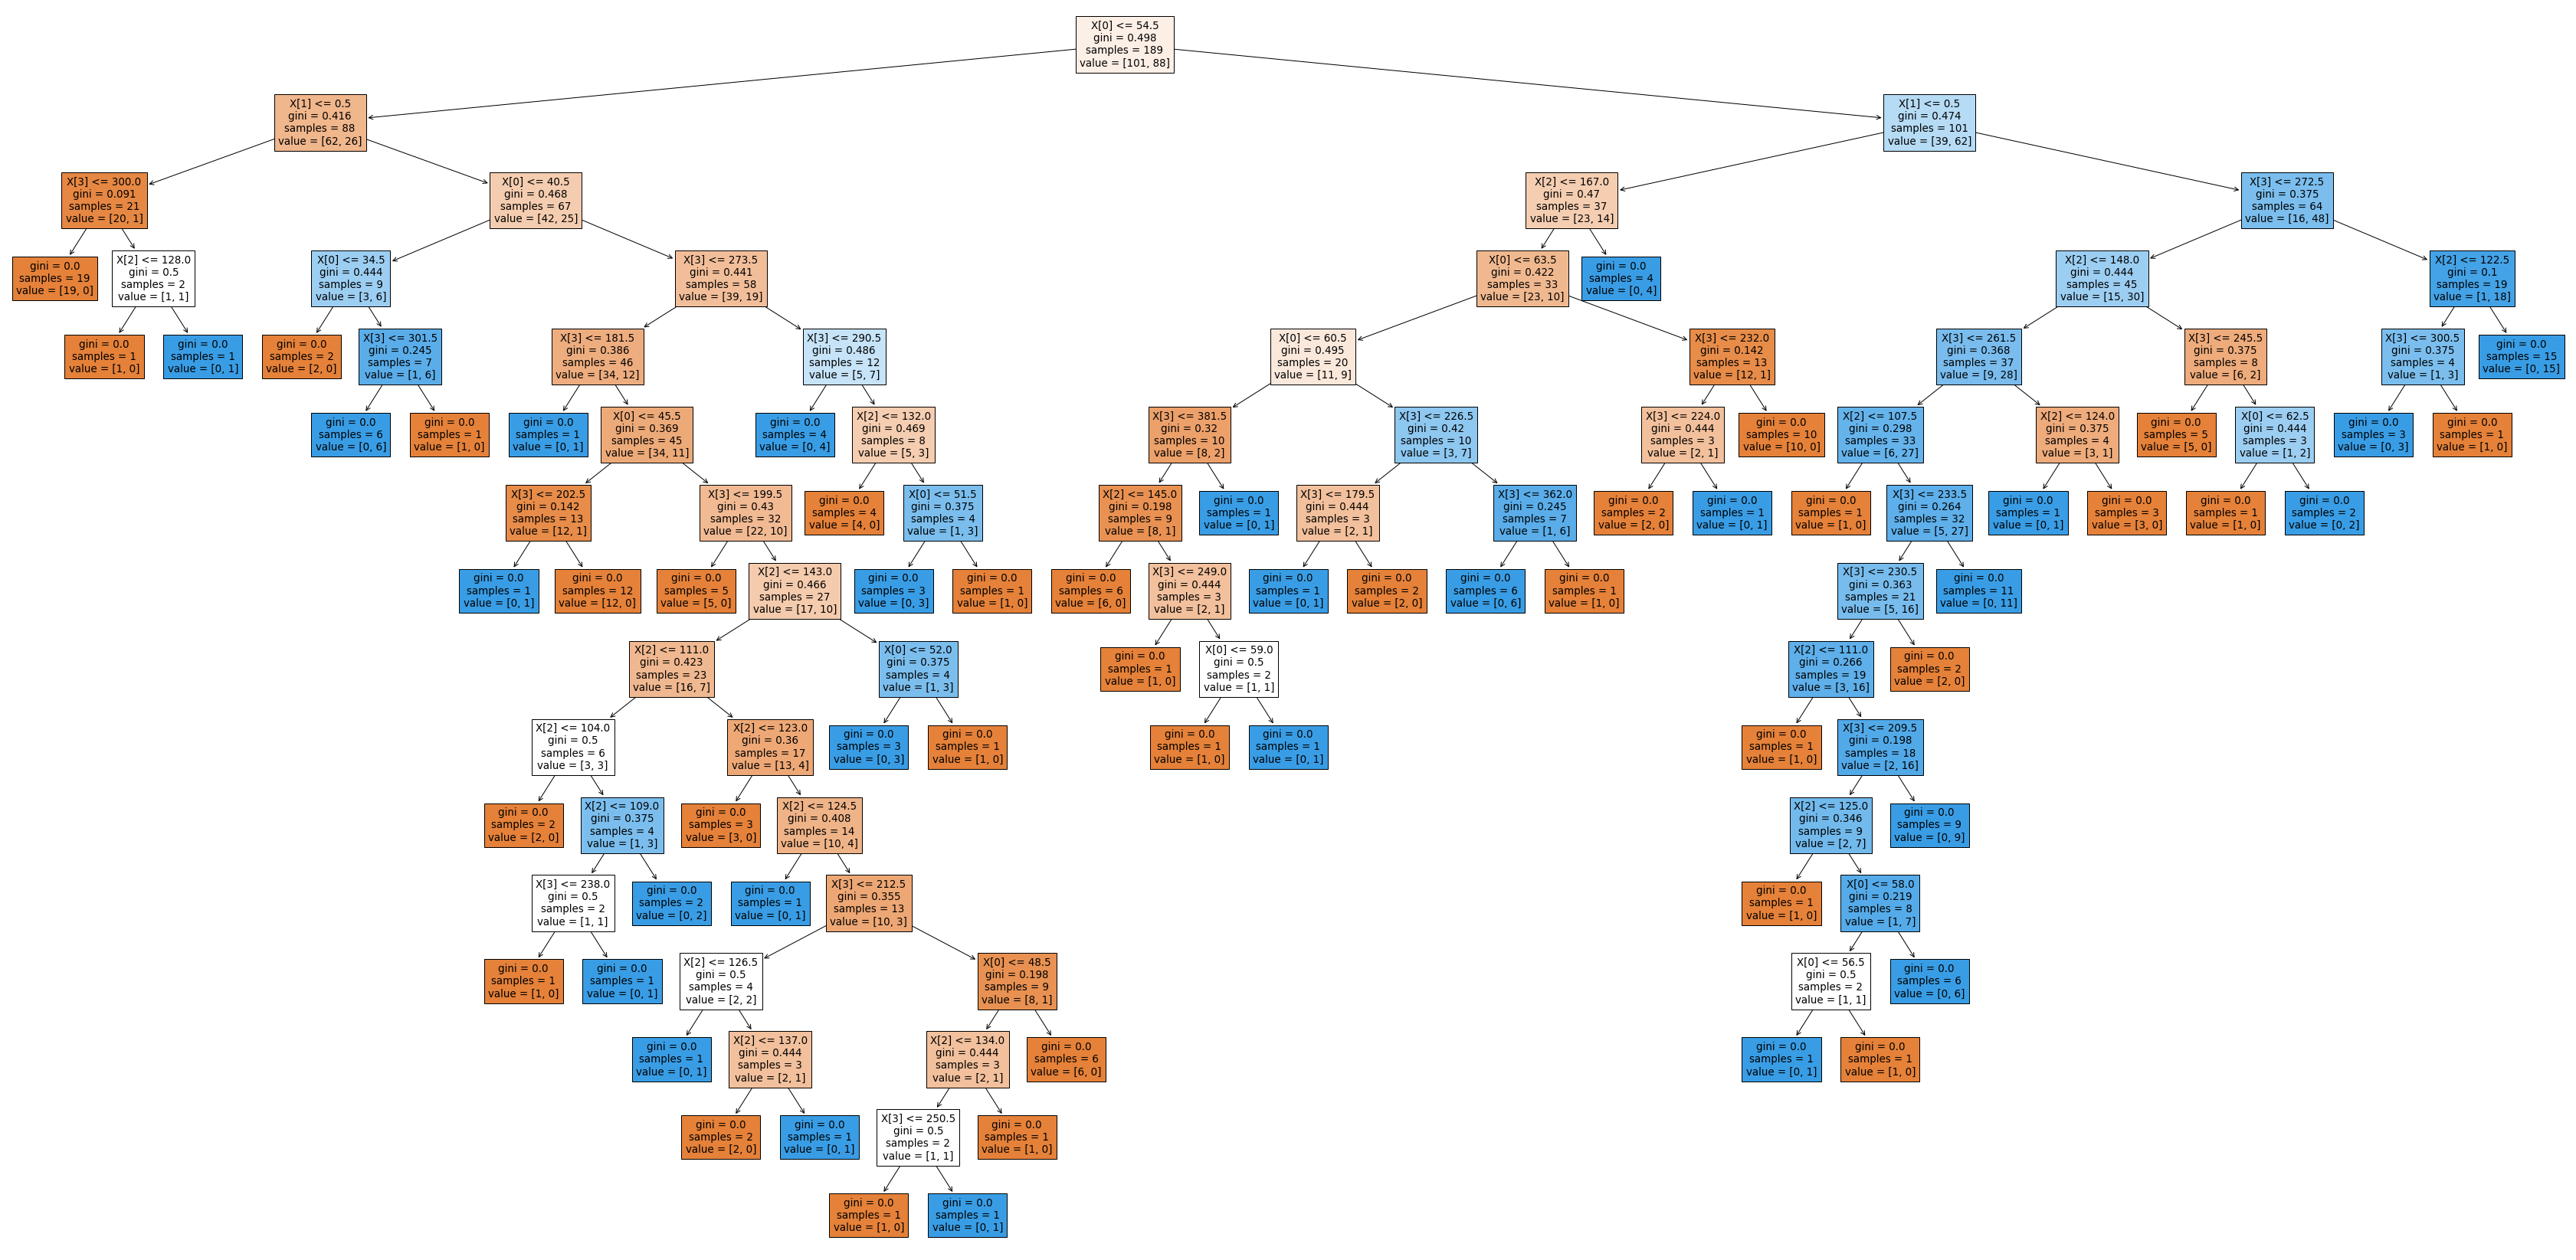

In [19]:
from sklearn.tree import plot_tree
plt.figure(figsize=(60,30))
plot_tree(model,filled=True);

In [20]:
def Dec_tree_img(dt_model):
    plt.figure(figsize=(60,30))
    plot_tree(dt_model,filled=True);
    

In [21]:
def Dec_tree_score(dt_model):
    train_pred=dt_model.predict(X_train)
    test_pred=dt_model.predict(X_test)
    print(dt_model.score(X_train,y_train))
    print(dt_model.score(X_test,y_test))
    print(confusion_matrix(y_train,train_pred))
    print(confusion_matrix(y_test,test_pred))

In [22]:
model1=tree.DecisionTreeClassifier(max_depth=40)


In [23]:
model1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=40)

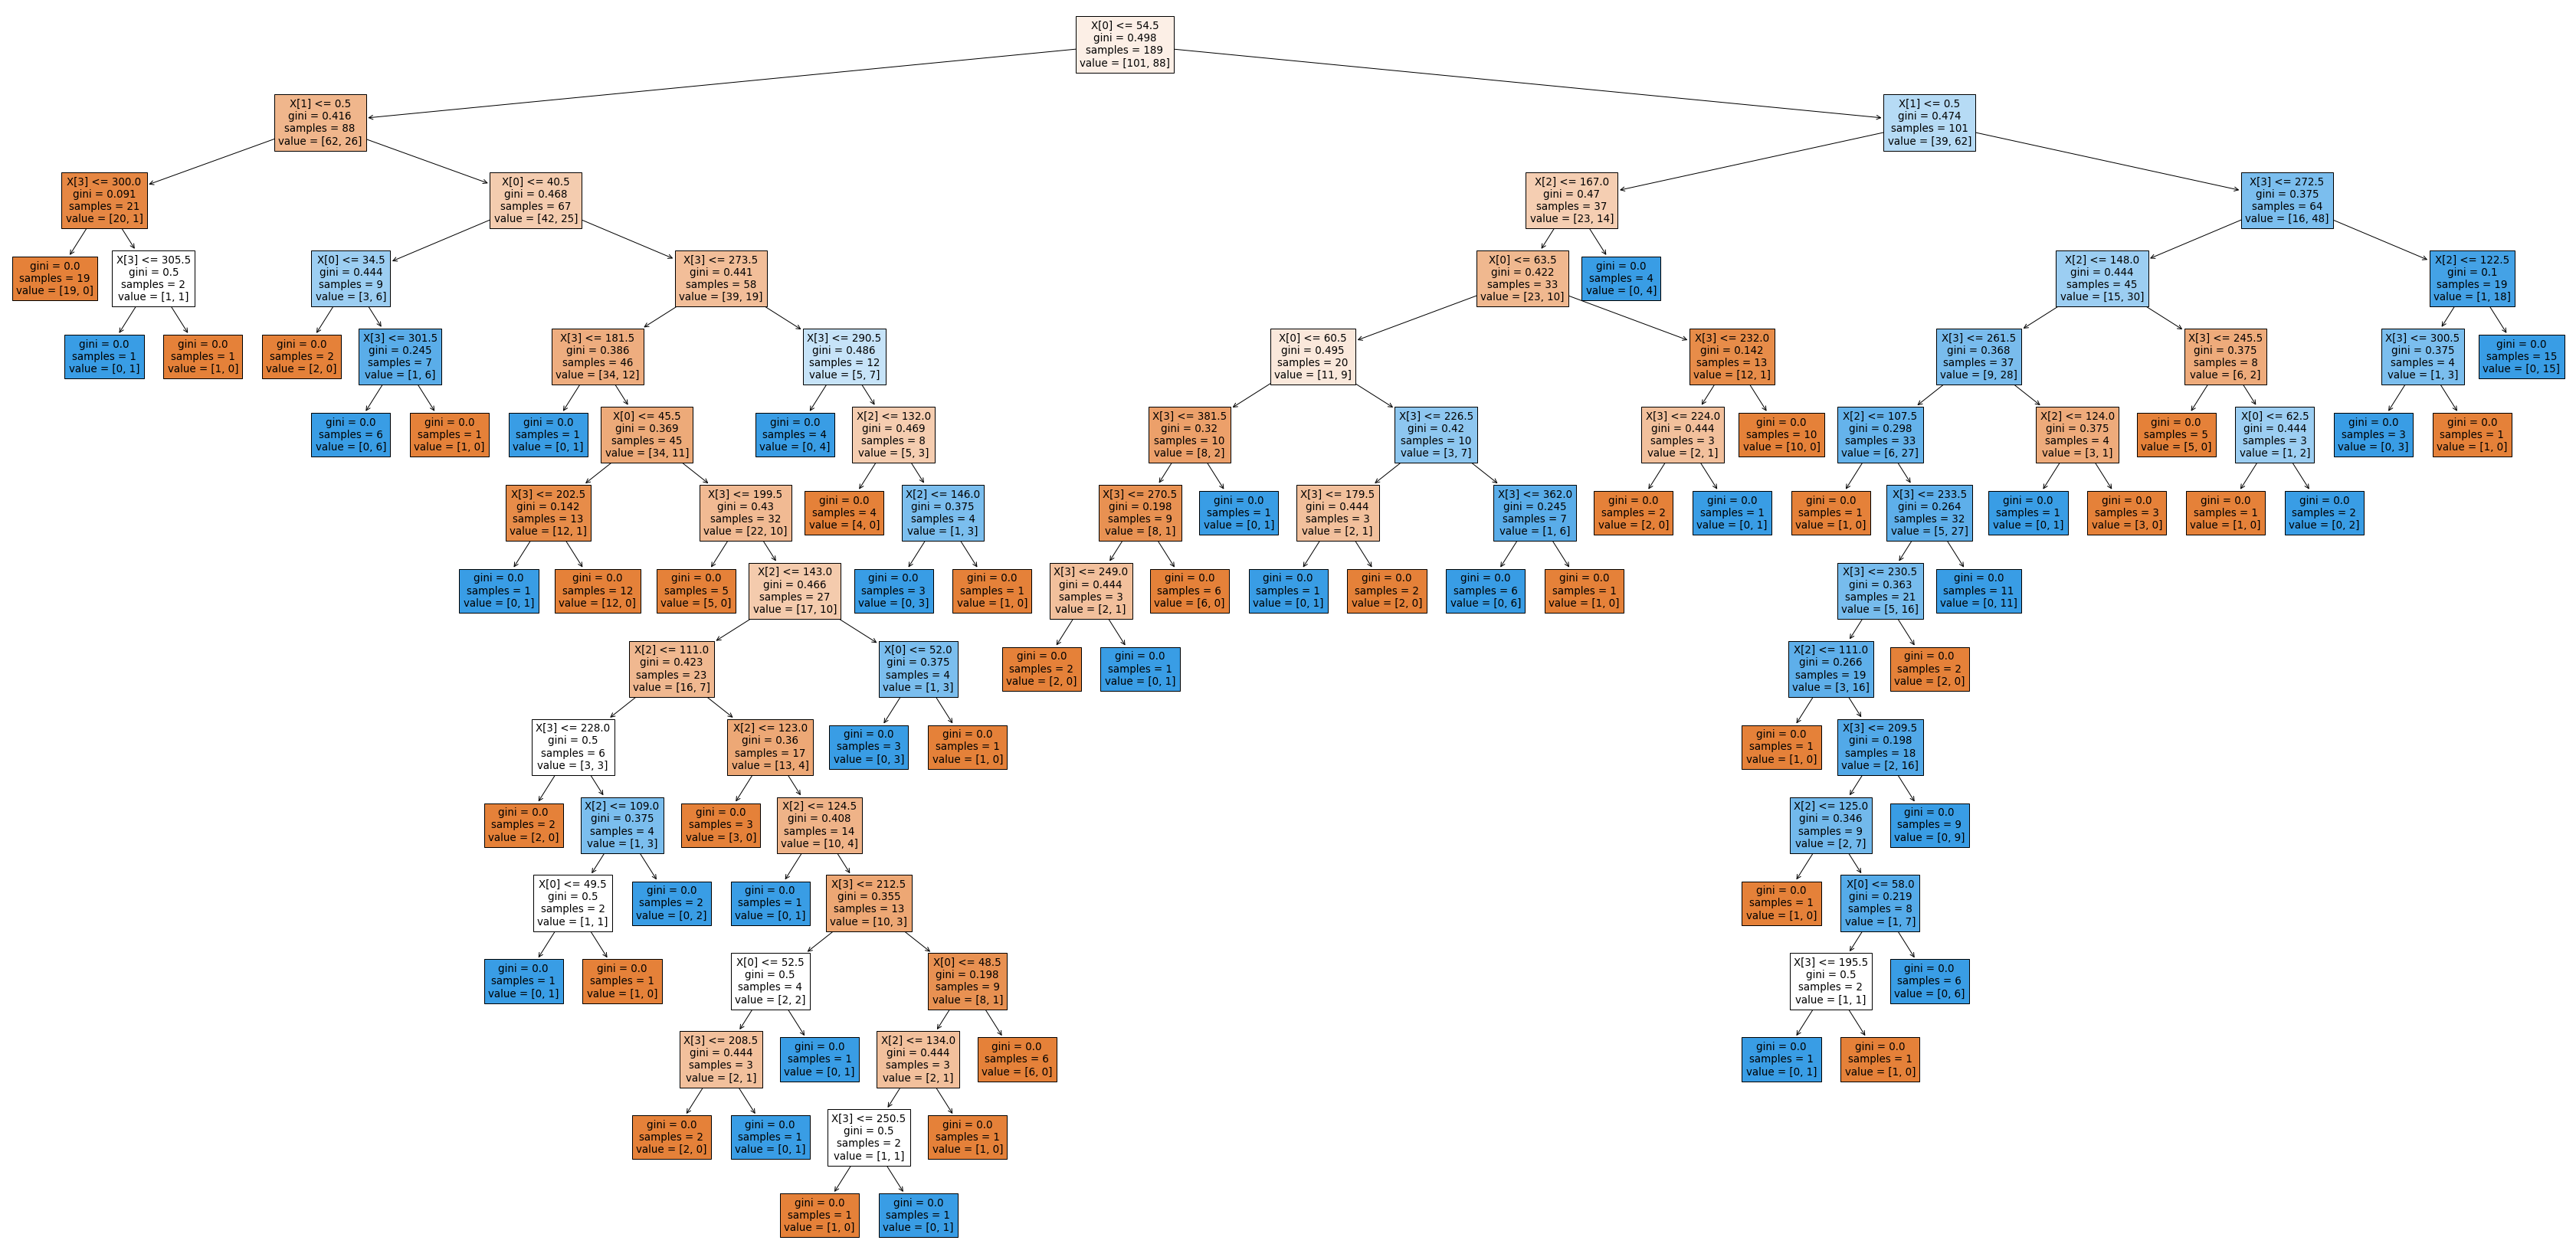

In [24]:
Dec_tree_img(model1)

In [25]:
Dec_tree_score(model1)

1.0
0.6296296296296297
[[101   0]
 [  0  88]]
[[32 17]
 [13 19]]


In [26]:
model2=tree.DecisionTreeClassifier(max_depth=3,random_state=42)
model2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

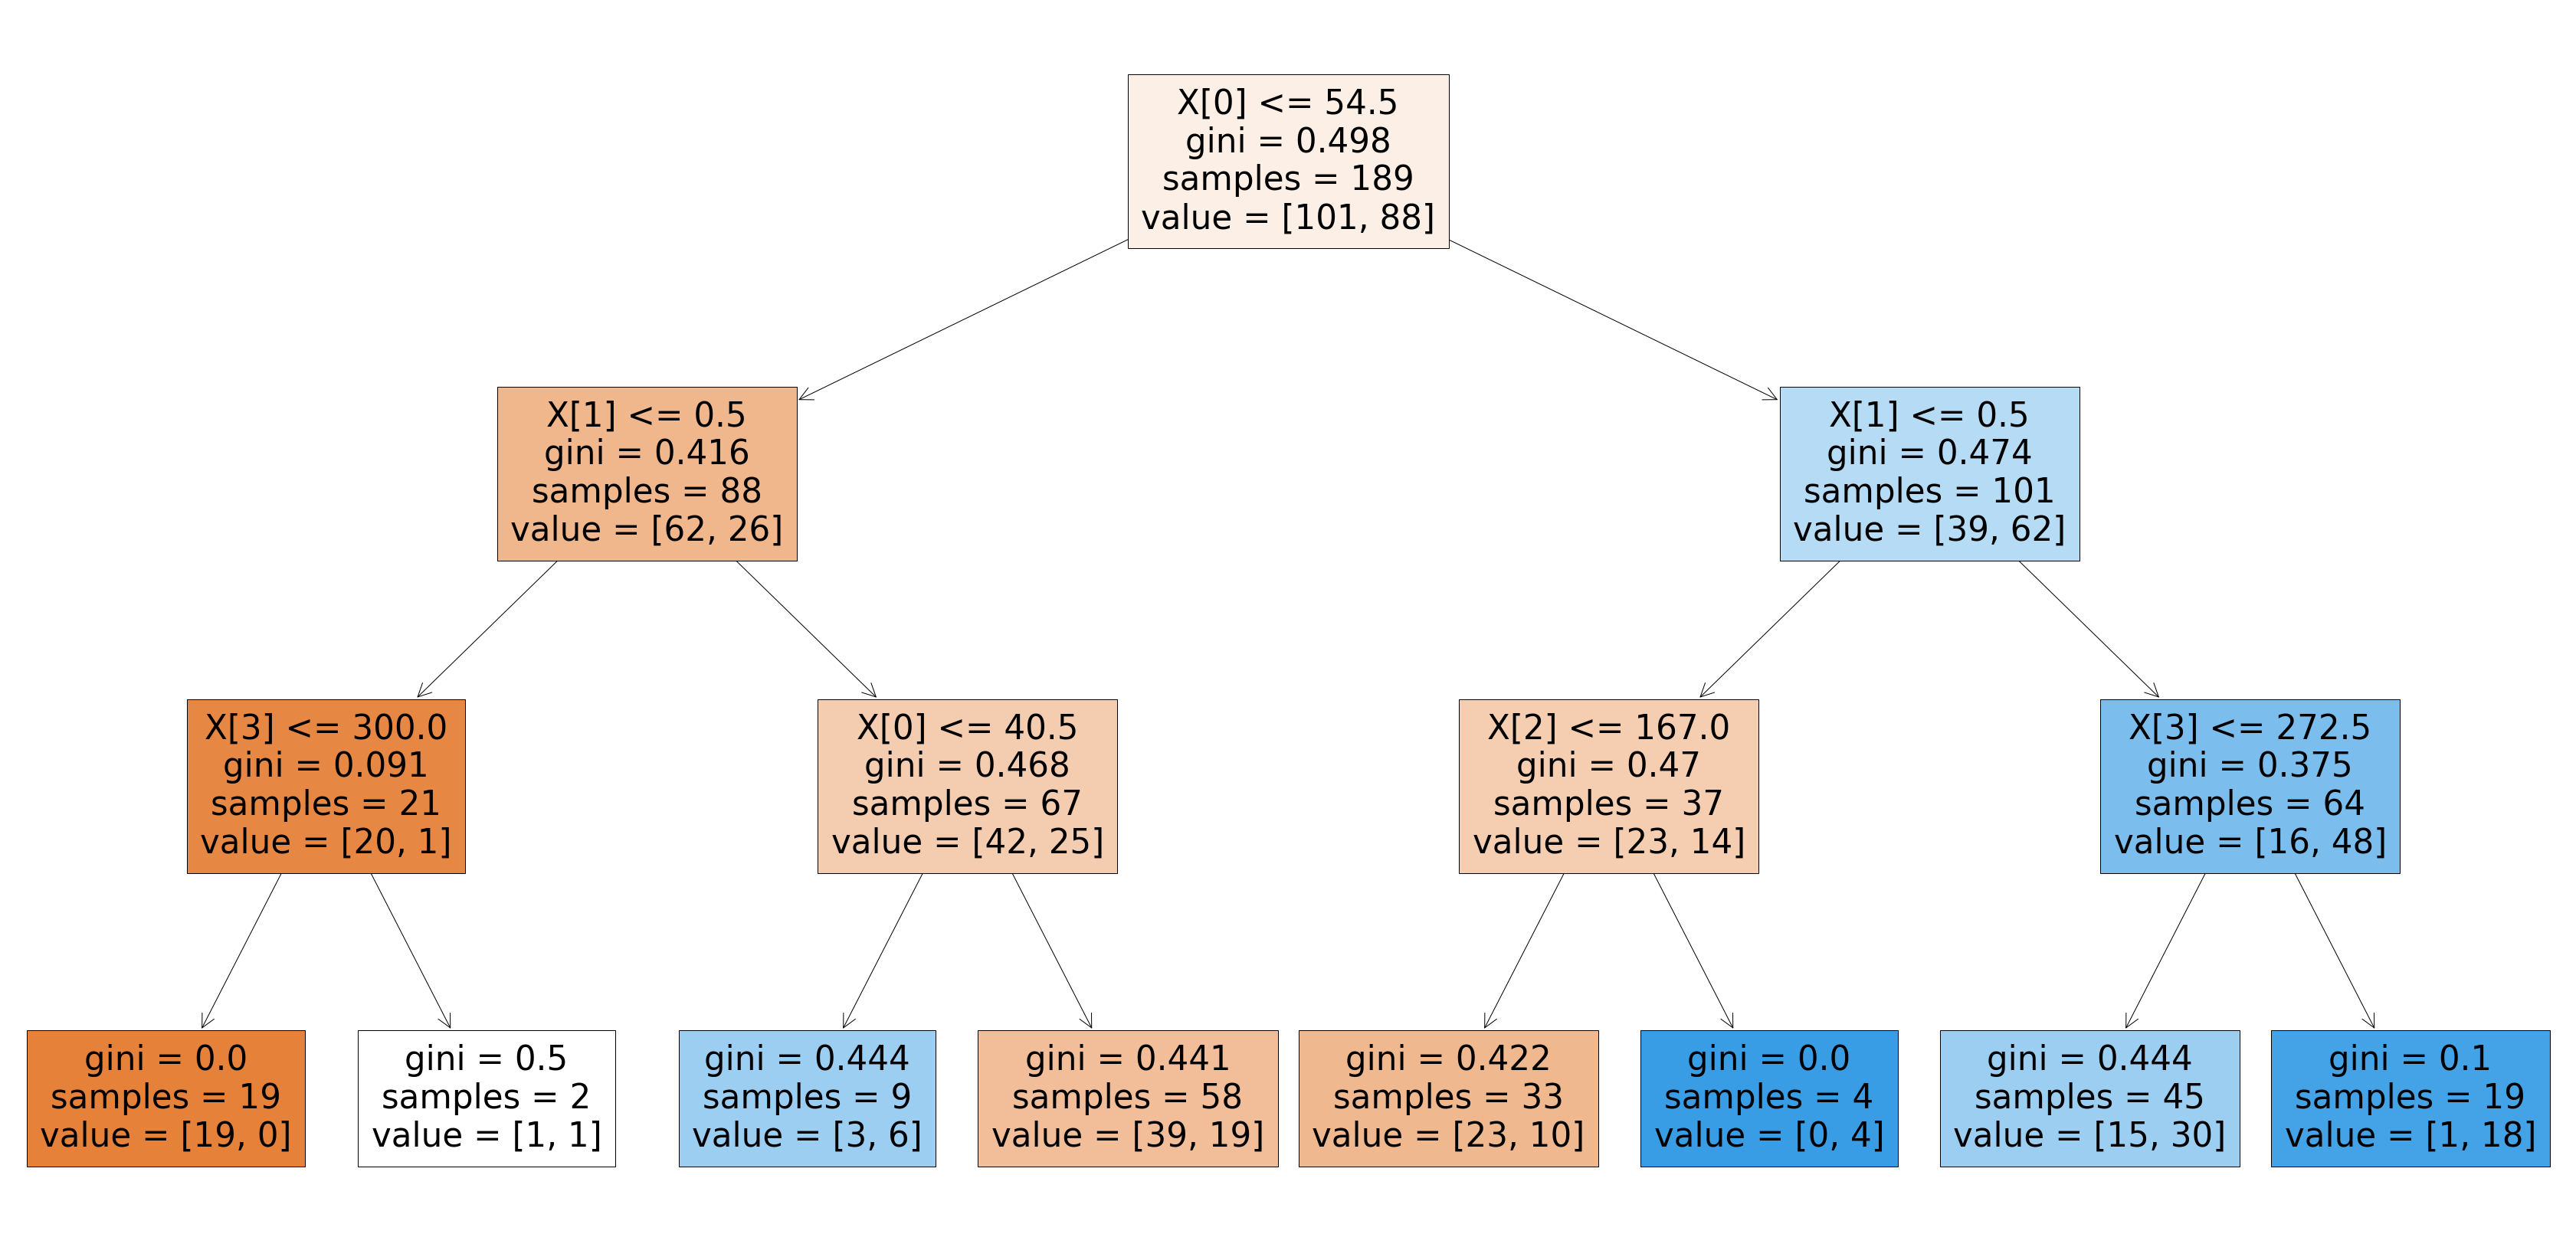

In [27]:
Dec_tree_img(model2)

In [28]:
Dec_tree_score(model2)

0.7407407407407407
0.6049382716049383
[[82 19]
 [30 58]]
[[35 14]
 [18 14]]


In [29]:
model3=tree.DecisionTreeClassifier(min_samples_split=20,random_state=42)
model3.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_split=20, random_state=42)

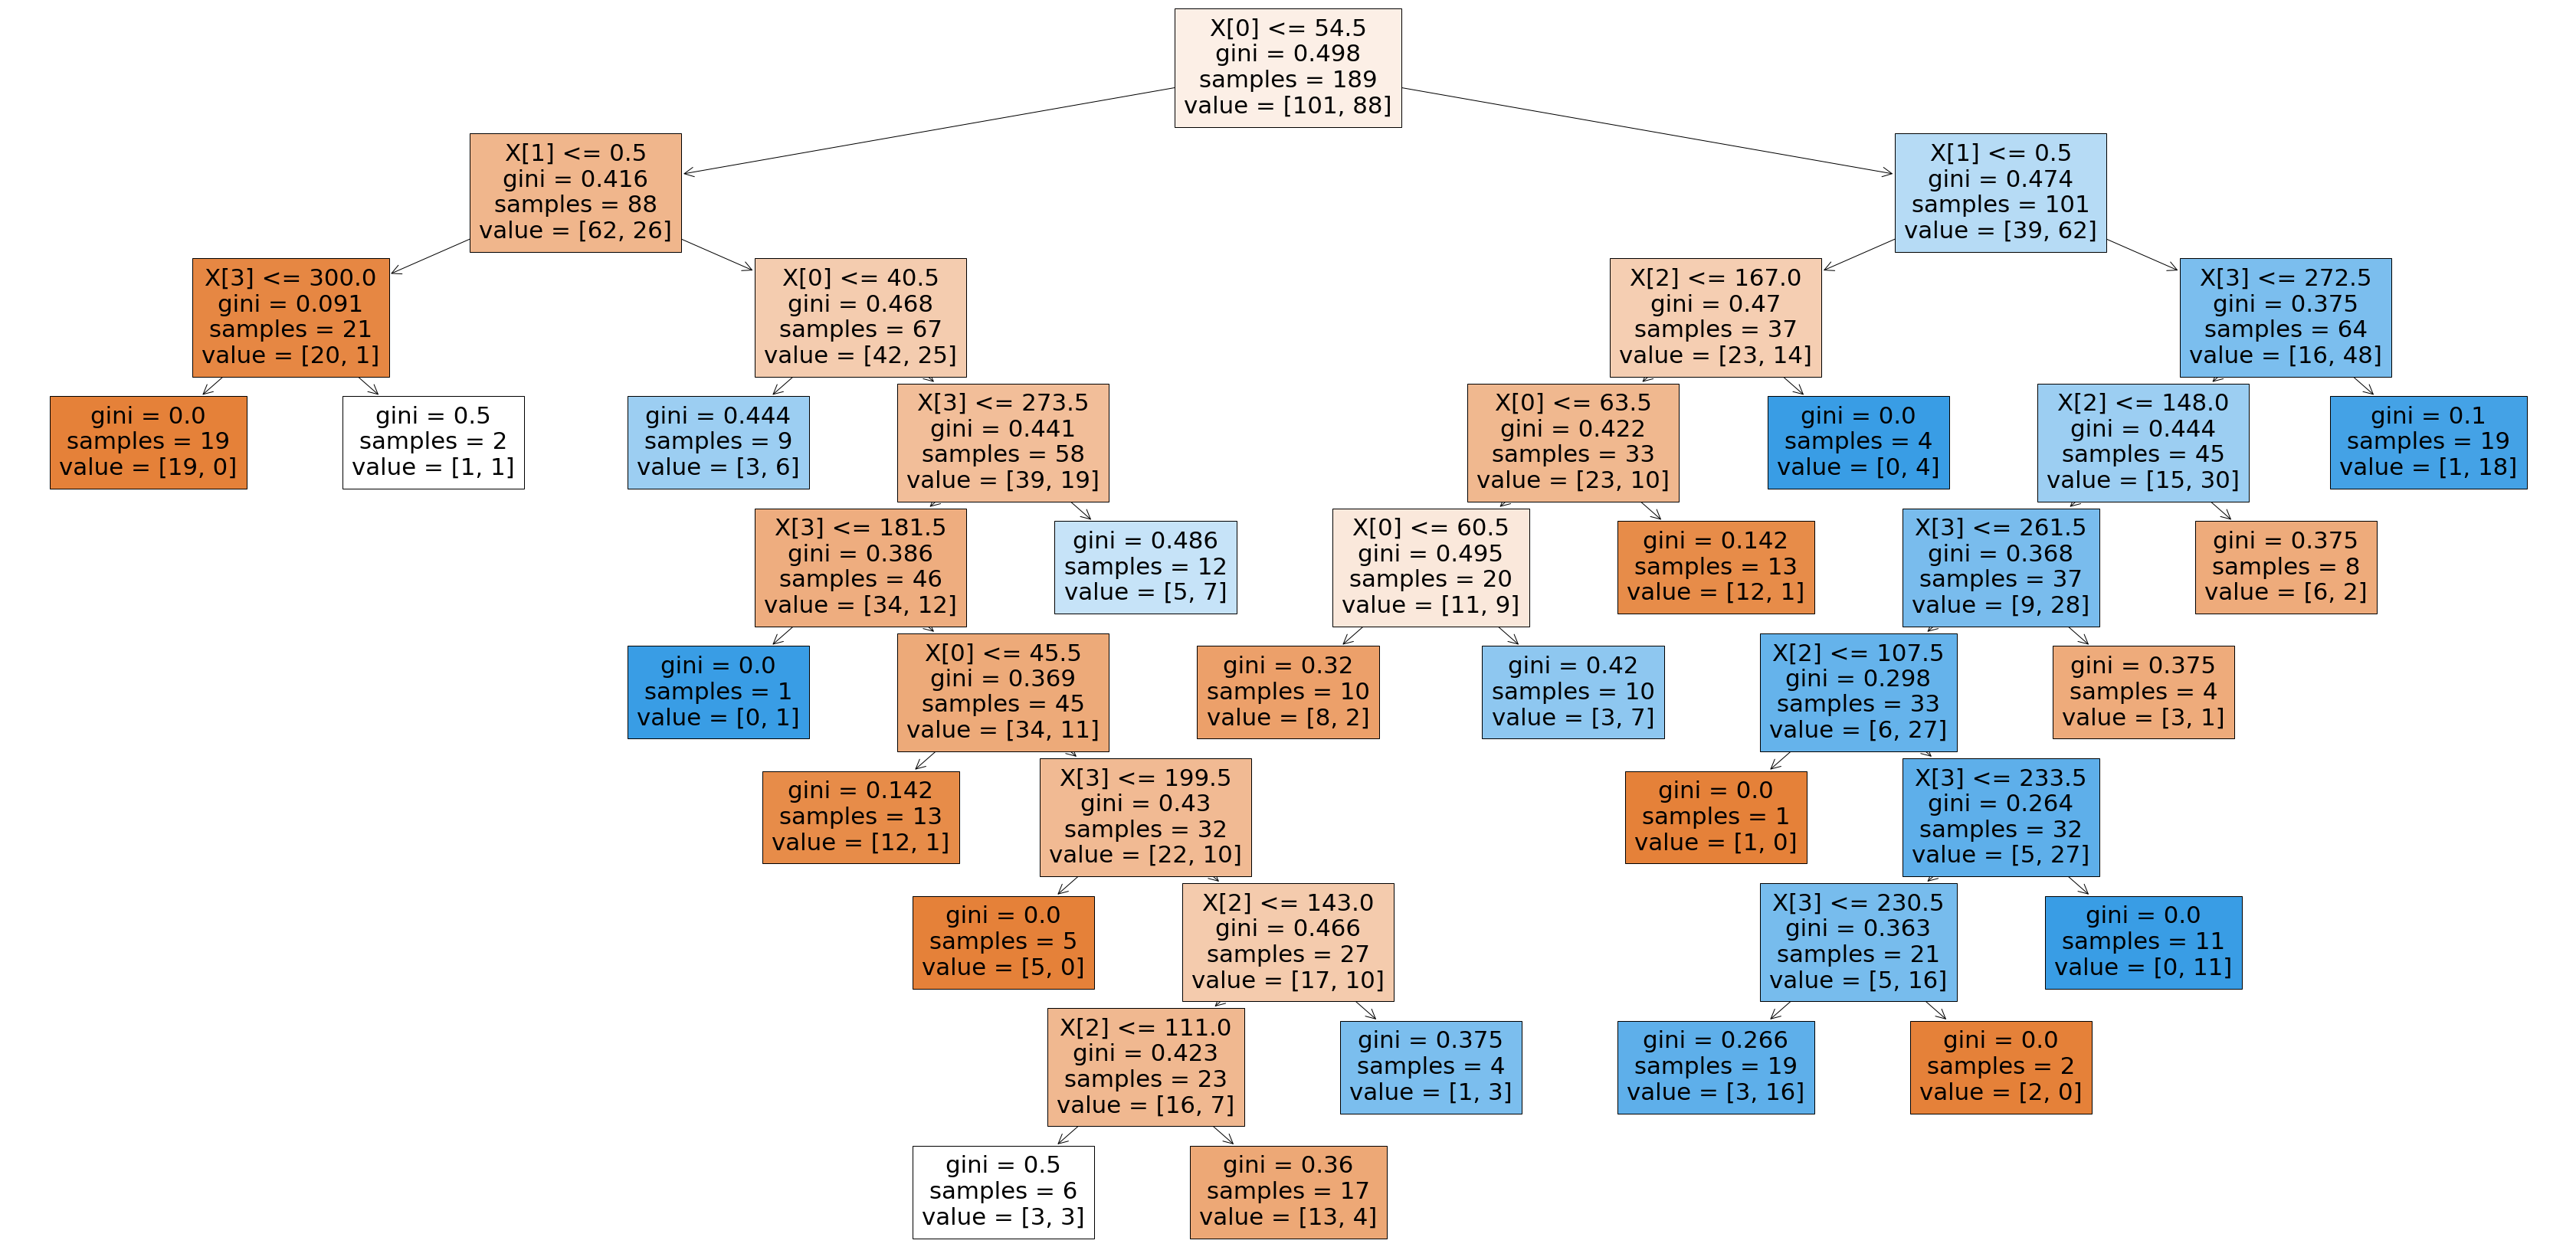

In [30]:
Dec_tree_img(model3)

In [31]:
Dec_tree_score(model3)

0.8359788359788359
0.6419753086419753
[[85 16]
 [15 73]]
[[32 17]
 [12 20]]


In [32]:
model4=tree.DecisionTreeClassifier(min_samples_leaf=20,random_state=42)
model4.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

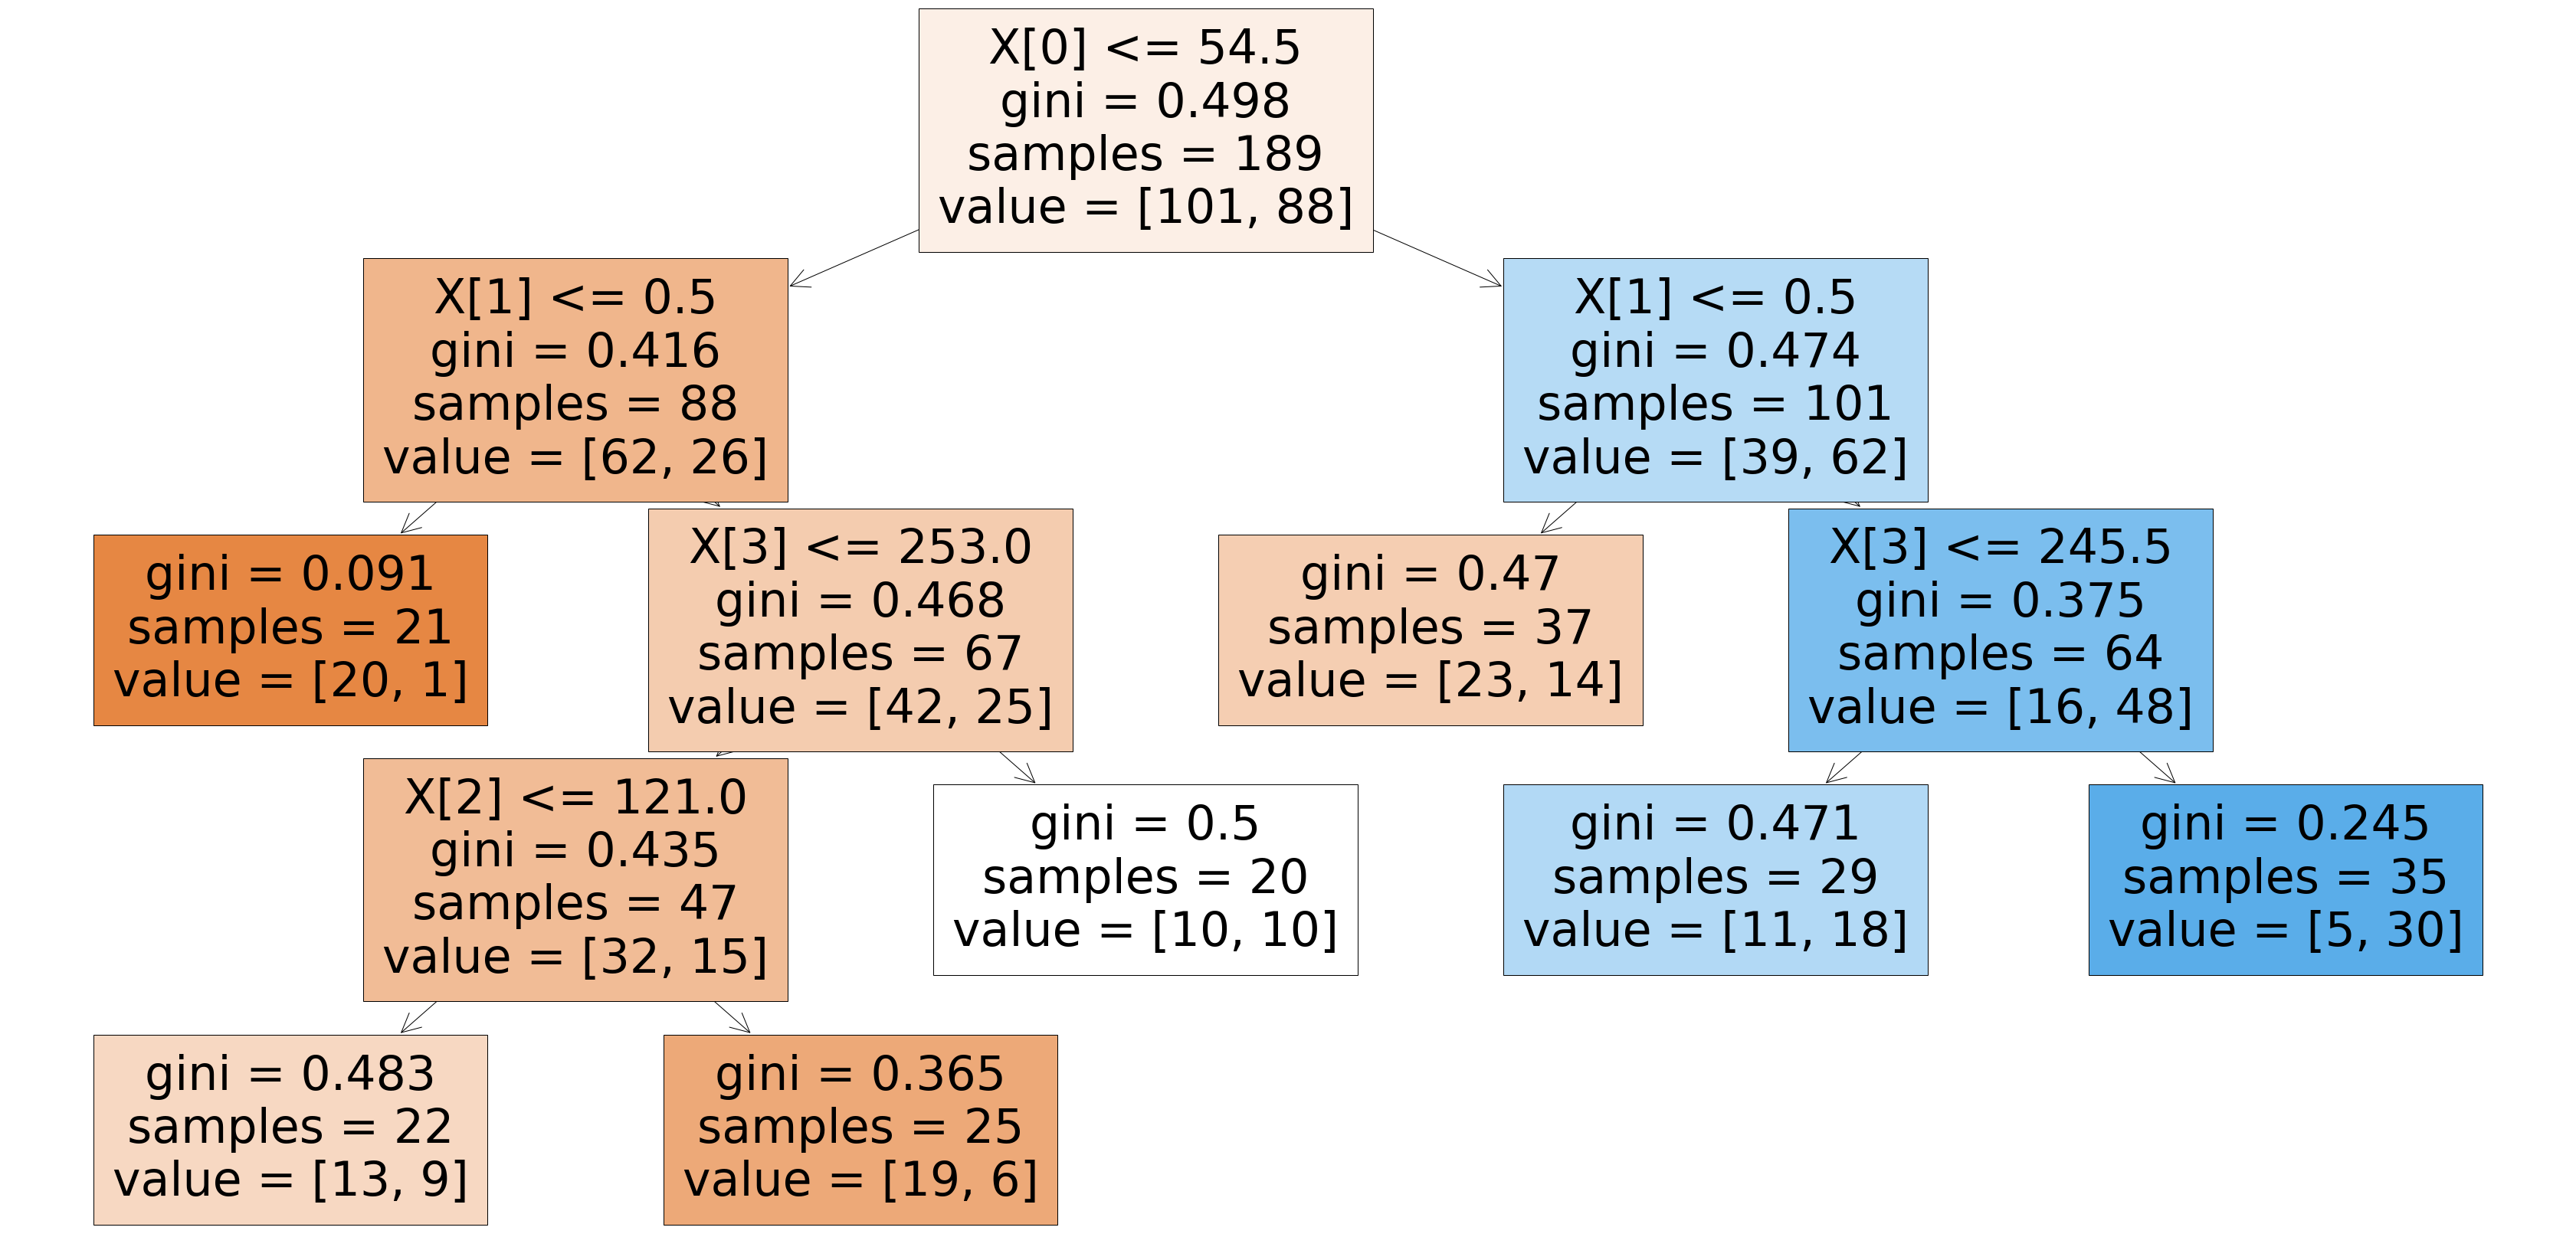

In [33]:
Dec_tree_img(model4)

In [34]:
Dec_tree_score(model4)

0.7037037037037037
0.6419753086419753
[[85 16]
 [40 48]]
[[38 11]
 [18 14]]


In [35]:
path=model.cost_complexity_pruning_path(X_train,y_train)
path

{'ccp_alphas': array([0.        , 0.00313541, 0.00313541, 0.00396825, 0.00459245,
        0.00462963, 0.0047766 , 0.004884  , 0.00501253, 0.00503905,
        0.00561239, 0.00705467, 0.00705467, 0.00705467, 0.00752499,
        0.00758377, 0.00792104, 0.00793651, 0.00793651, 0.00840485,
        0.00881834, 0.00907029, 0.01099457, 0.01218751, 0.01241598,
        0.01450699, 0.01792761, 0.01833869, 0.0342634 , 0.05045163]),
 'impurities': array([0.        , 0.00940623, 0.01881246, 0.02674897, 0.04971124,
        0.0589705 , 0.06852371, 0.07829172, 0.08831678, 0.09839488,
        0.10961966, 0.11667434, 0.12372901, 0.16605705, 0.17358204,
        0.18874959, 0.19667062, 0.20460713, 0.21254364, 0.23775819,
        0.24657653, 0.25564683, 0.31061967, 0.32280718, 0.34763914,
        0.37665312, 0.39458073, 0.41291941, 0.44718281, 0.49763444])}

In [36]:
ccp_alphas,impurities=path.ccp_alphas,path.impurities

In [37]:
models=[]
for i in ccp_alphas:
    model=tree.DecisionTreeClassifier(random_state=0, ccp_alpha=i)
    model.fit(X_train,y_train)
    models.append(model)
print("Number of nodes in the last tree is:",models[-1].tree_.node_count)

print("ccp_alpha:",ccp_alphas)
print(ccp_alphas[-1])

Number of nodes in the last tree is: 1
ccp_alpha: [0.         0.00313541 0.00313541 0.00396825 0.00459245 0.00462963
 0.0047766  0.004884   0.00501253 0.00503905 0.00561239 0.00705467
 0.00705467 0.00705467 0.00752499 0.00758377 0.00792104 0.00793651
 0.00793651 0.00840485 0.00881834 0.00907029 0.01099457 0.01218751
 0.01241598 0.01450699 0.01792761 0.01833869 0.0342634  0.05045163]
0.05045163120494467


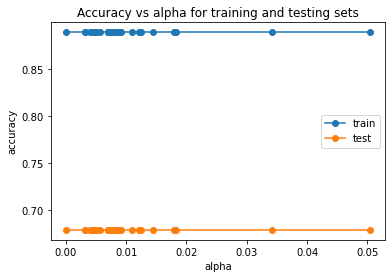

In [52]:
train_scores = [model5.score(X_train, y_train) for clf in models]
test_scores = [model5.score(X_test, y_test) for clf in models]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [64]:
model5 = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=0.01099457)
model5.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01099457, random_state=0)

In [65]:
pred=model5.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.654320987654321

In [68]:
pred1=model5.predict(X_train)
from sklearn.metrics import accuracy_score
accuracy_score(y_train, pred1)

0.7777777777777778

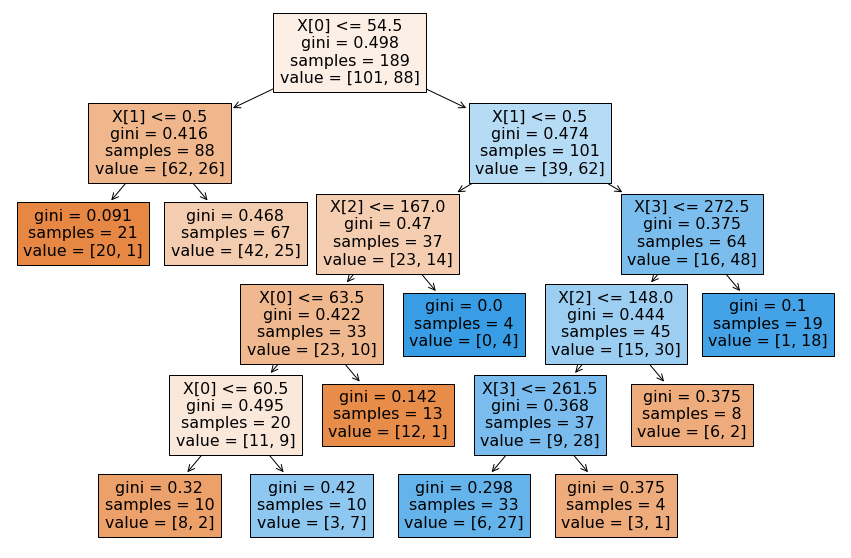

In [66]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model5,filled=True);